In [66]:
import torch, torchvision
from torchvision import models,  transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
vgg16  = torchvision.models.vgg16(pretrained=True)
vgg16.device = device

In [181]:
def imagenet_classes():
    with open('./resources/p1/imagenet_classes.txt','r') as f:
        categories =  eval(f.read())
        return {idx: category.strip().split(",")[0] for idx, category in categories.items()}
    
image1 = Image.open(r'./resources/p4/img1.jpg')
image2 = Image.open(r'./resources/p4/img2.jpg')
image3 = Image.open(r'./resources/p4/img3.jpg')
image4 = Image.open(r'./resources/p4/img4.jpg')

classes = imagenet_classes()
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5],
                         std=[0.5, 0.5, 0.5]),
    
])

x1 = torch.unsqueeze(transform(image1), 0)
x2 = torch.unsqueeze(transform(image2), 0)
x3 = torch.unsqueeze(transform(image3), 0)
x4 = torch.unsqueeze(transform(image4), 0)

In [216]:
classes[812]

'space shuttle'

In [215]:
x_adv1 = target_adversarial_image(vgg16, x1, 812)
x_adv2 = non_target_adversarial_image(vgg16, x2)
x_adv3 = non_target_adversarial_image(vgg16, x3)
x_adv4 = non_target_adversarial_image(vgg16, x4)

New Prob 0.3446744680404663
New Prob 0.7395267486572266
New Prob 0.780380129814148
New Prob 0.868217945098877
New Prob 0.8894180059432983
New Prob 0.9421868324279785
New Prob 0.9694516658782959
New Prob 0.9779248237609863
New Prob 0.9826693534851074
Original Predict class: Samoyed, Probability: 0.9814605116844177
New Prob 0.9814605116844177
New Prob 0.00029339606408029795
New Prob 8.955578778113704e-06
New Prob 1.0720950793796646e-09
New Prob 1.070586286289199e-09
New Predict class: Siberian husky, Probability: 0.6242964267730713
Original Predict class: bison, Probability: 0.9859951138496399
New Prob 0.9859951138496399
New Prob 0.0020627158228307962
New Prob 0.00010187469888478518
New Prob 2.4192521319577054e-09
New Prob 2.402364973619342e-09
New Predict class: standard poodle, Probability: 0.8389143943786621
Original Predict class: Persian cat, Probability: 0.9765258431434631
New Prob 0.9765258431434631
New Prob 0.00019904880900867283
New Prob 8.128951662911277e-07
New Prob 2.96527957

Original Predict class: bell pepper, Probability: 0.9877254366874695
New Prob 0.9877254366874695
New Prob 0.00014338015171233565
New Prob 7.354527143538236e-13


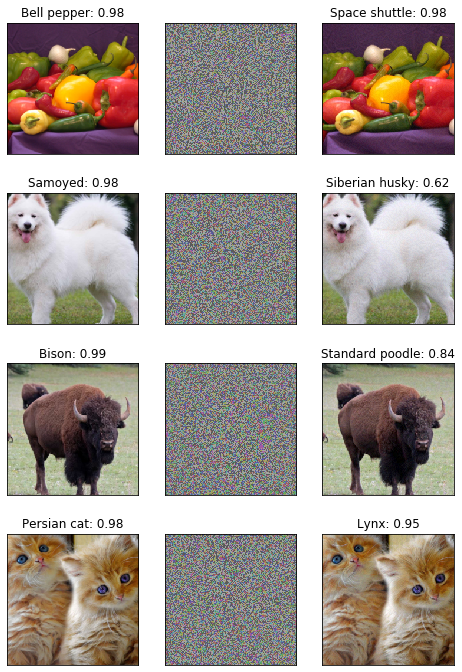

In [254]:
fig, ax = plt.subplots(4,3, figsize=(8, 12))
img10, img11, img12 = to_numpy(x1), to_numpy((x_adv1 - x1.cuda()) * 10), to_numpy(x_adv1)
img20, img21, img22 = to_numpy(x2), to_numpy((x_adv2 - x2.cuda()) * 10), to_numpy(x_adv2)
img30, img31, img32 = to_numpy(x3), to_numpy((x_adv3 - x3.cuda()) * 10), to_numpy(x_adv3)
img40, img41, img42 = to_numpy(x4), to_numpy((x_adv4 - x4.cuda()) * 10), to_numpy(x_adv4)

ax[0][0].imshow(img10)
ax[0][0].set_title('Bell pepper: 0.98')
ax[0][1].imshow(img11)
ax[0][2].imshow(img12)
ax[0][2].set_title('Space shuttle: 0.98')

ax[1][0].imshow(img20)
ax[1][0].set_title('Samoyed: 0.98')
ax[1][1].imshow(img21)
ax[1][2].imshow(img22)
ax[1][2].set_title('Siberian husky: 0.62')

ax[2][0].imshow(img30)
ax[2][0].set_title('Bison: 0.99')
ax[2][1].imshow(img31)
ax[2][2].imshow(img32)
ax[2][2].set_title('Standard poodle: 0.84')

ax[3][0].imshow(img40)
ax[3][0].set_title('Persian cat: 0.98')

ax[3][1].imshow(img41)
ax[3][2].imshow(img42)
ax[3][2].set_title('Lynx: 0.95')

for i in range(4):
    for j in range(3):
        ax[i][j].set_xticklabels([])
        ax[i][j].set_yticklabels([])
        ax[i][j].tick_params(axis='both', which='both', length=0)

plt.savefig('4-1')

In [246]:
PIL_x_adv1 = to_PILimage(x_adv1)
PIL_x_adv2 = to_PILimage(x_adv2)
PIL_x_adv3 = to_PILimage(x_adv3)
PIL_x_adv4 = to_PILimage(x_adv4)
def flip_transform(PIL_image):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5],
                             std=[0.5, 0.5, 0.5]),
    ])
    ret = transforms.functional.hflip(PIL_image)
    ret = torch.unsqueeze(transform(ret), 0)
    print(predict(ret))
    return to_numpy(ret)

def crop_transform(PIL_image):
    transform = transforms.Compose([
        transforms.CenterCrop(179),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5],
                             std=[0.5, 0.5, 0.5]),
    ])
    ret = torch.unsqueeze(transform(PIL_image), 0)
    print(predict(ret))
    return to_numpy(ret)

def grayscale_transform(PIL_image):
    transform = transforms.Compose([
        transforms.Grayscale(3),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5],
                             std=[0.5, 0.5, 0.5]),
    ])
    ret = torch.unsqueeze(transform(PIL_image), 0)
    print(predict(ret))
    return to_numpy(ret)

def rotate_transform(PIL_image):
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5],
                             std=[0.5, 0.5, 0.5]),
    ])
    ret = transforms.functional.rotate(PIL_image, 30)
    ret = torch.unsqueeze(transform(ret), 0)
    print(predict(ret))
    return to_numpy(ret)

q00 = flip_transform(PIL_x_adv1)
q01 = crop_transform(PIL_x_adv1)
q02 = grayscale_transform(PIL_x_adv1)
q03 = rotate_transform(PIL_x_adv1)
q10 = flip_transform(PIL_x_adv2)
q11 = crop_transform(PIL_x_adv2)
q12 = grayscale_transform(PIL_x_adv2)
q13 = rotate_transform(PIL_x_adv2)
q20 = flip_transform(PIL_x_adv3)
q21 = crop_transform(PIL_x_adv3)
q22 = grayscale_transform(PIL_x_adv3)
q23 = rotate_transform(PIL_x_adv3)
q30 = flip_transform(PIL_x_adv4)
q31 = crop_transform(PIL_x_adv4)
q32 = grayscale_transform(PIL_x_adv4)
q33 = rotate_transform(PIL_x_adv4)

('bell pepper', tensor(0.2720, device='cuda:0'))
('cucumber', tensor(0.1428, device='cuda:0'))
('teddy', tensor(0.1955, device='cuda:0'))
('cucumber', tensor(0.1411, device='cuda:0'))
('Eskimo dog', tensor(0.5086, device='cuda:0'))
('Eskimo dog', tensor(0.4783, device='cuda:0'))
('Eskimo dog', tensor(0.4802, device='cuda:0'))
('Samoyed', tensor(0.7377, device='cuda:0'))
('ox', tensor(0.3342, device='cuda:0'))
('standard poodle', tensor(0.6468, device='cuda:0'))
('standard poodle', tensor(0.8023, device='cuda:0'))
('Irish water spaniel', tensor(0.3817, device='cuda:0'))
('lynx', tensor(0.5040, device='cuda:0'))
('lynx', tensor(0.4852, device='cuda:0'))
('lynx', tensor(0.6179, device='cuda:0'))
('tiger cat', tensor(0.4945, device='cuda:0'))


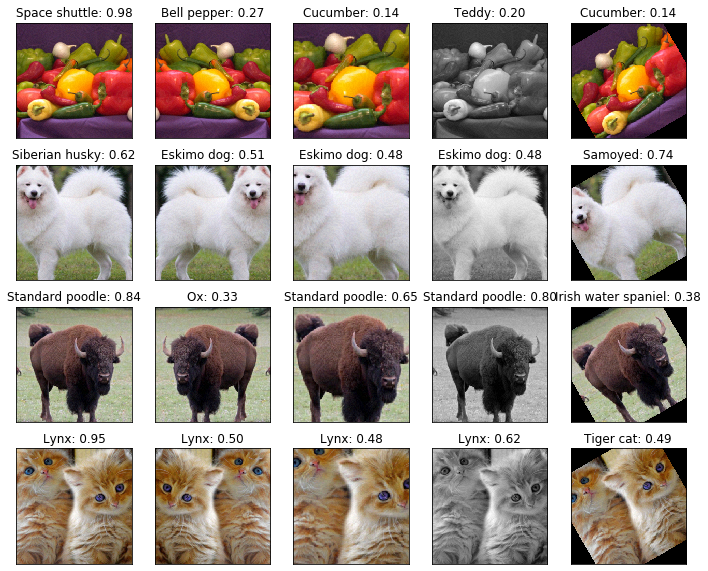

In [257]:
fig, ax = plt.subplots(4,5, figsize=(12, 10))
ax[0][0].imshow(img12)
ax[0][0].set_title('Space shuttle: 0.98')
ax[0][1].imshow(q00)
ax[0][1].set_title('Bell pepper: 0.27')
ax[0][2].imshow(q01)
ax[0][2].set_title('Cucumber: 0.14')
ax[0][3].imshow(q02)
ax[0][3].set_title('Teddy: 0.20')
ax[0][4].imshow(q03)
ax[0][4].set_title('Cucumber: 0.14')

ax[1][0].imshow(img22)
ax[1][0].set_title('Siberian husky: 0.62')
ax[1][1].imshow(q10)
ax[1][1].set_title('Eskimo dog: 0.51')
ax[1][2].imshow(q11)
ax[1][2].set_title('Eskimo dog: 0.48')
ax[1][3].imshow(q12)
ax[1][3].set_title('Eskimo dog: 0.48')
ax[1][4].imshow(q13)
ax[1][4].set_title('Samoyed: 0.74')

ax[2][0].imshow(img32)
ax[2][0].set_title('Standard poodle: 0.84')
ax[2][1].imshow(q20)
ax[2][1].set_title('Ox: 0.33')
ax[2][2].imshow(q21)
ax[2][2].set_title('Standard poodle: 0.65')
ax[2][3].imshow(q22)
ax[2][3].set_title('Standard poodle: 0.80')
ax[2][4].imshow(q23)
ax[2][4].set_title('Irish water spaniel: 0.38')


ax[3][0].imshow(img42)
ax[3][0].set_title('Lynx: 0.95')
ax[3][1].imshow(q30)
ax[3][1].set_title('Lynx: 0.50')
ax[3][2].imshow(q31)
ax[3][2].set_title('Lynx: 0.48')
ax[3][3].imshow(q32)
ax[3][3].set_title('Lynx: 0.62')
ax[3][4].imshow(q33)
ax[3][4].set_title('Tiger cat: 0.49')

for i in range(4):
    for j in range(5):
        ax[i][j].set_xticklabels([])
        ax[i][j].set_yticklabels([])
        ax[i][j].tick_params(axis='both', which='both', length=0)

plt.savefig('4-2')

In [214]:
def target_adversarial_image(model, x, y_fool, epochs=1000, l=15000, eps=0.03):
    
    x_adv, x = x.cuda(), x.cuda()
    min_loss = float('inf')
    x_prime, y_fool = x.cuda(), torch.LongTensor([y_fool]).cuda()
    x_prime.requires_grad_(True)
    
    model.to(device)
    model.eval()
    
    for i in range(epochs):
        with torch.set_grad_enabled(True):
          
            output = model(x_prime)

            value, category = torch.max(output, 1)
            
            #get the probability of the target class
            prob = torch.nn.functional.softmax(output, dim = 1)[0][y_fool]
            loss = torch.nn.CrossEntropyLoss()(output, y_fool)
            loss += (l / 2) * ((x_prime - x).norm(p=float("inf")))
            #minimizing x_adv_loss to find argmin x'
            if loss < min_loss and category == y_fool.data:
                x_adv = x_prime
                min_loss = loss
                print("New Prob {}".format(torch.nn.functional.softmax(vgg16(x_adv),dim = 1)[0][812].data))

            #find gradient prob(y fool|x') w.r.t. x'
            prob.backward()
            
            #first formula, inputs.grad is the target gradient
            tmp = (x_prime + (l * x_prime.grad)).cuda()

            #second formula
            tmp = torch.where(tmp > x + eps, x + eps, tmp)
            tmp = torch.where(tmp < x - eps, x - eps, tmp)
            x_prime = torch.autograd.Variable(tmp, requires_grad=True).cuda()
            
    return x_adv

def non_target_adversarial_image(model, x, epochs=5, l=15000, eps=0.03):
    
    x_adv, x = x.cuda(), x.cuda()
    max_loss = float('-inf')
    x_prime = x.cuda()
    x_prime.requires_grad_(True)
    
    model.to(device)
    model.eval()
    
    y = torch.max(model(x), 1)[1]
    prob = torch.nn.functional.softmax(model(x), dim = 1)[0][y]
    print("Original Predict class: {}, Probability: {}".format(classes[int(y[0].data)], prob[0].data))
    
    for i in range(epochs):
        with torch.set_grad_enabled(True):
          
            output = model(x_prime)
            
            #get the probability of the target class
            prob = torch.nn.functional.softmax(output, dim = 1)[0][y]
            loss = torch.nn.CrossEntropyLoss()(output, y)
            #minimizing x_adv_loss to find argmin x'
            if loss > max_loss:
                x_adv = x_prime
                max_loss = loss
                print("New Prob {}".format(torch.nn.functional.softmax(vgg16(x_adv),dim = 1)[0][y][0].data))

            #find gradient prob(y fool|x') w.r.t. x'
            prob.backward()
            
            #first formula, inputs.grad is the target gradient
            tmp = (x_prime - (l * x_prime.grad)).cuda()

            #second formula
            tmp = torch.where(tmp > x + eps, x + eps, tmp)
            tmp = torch.where(tmp < x - eps, x - eps, tmp)
            x_prime = torch.autograd.Variable(tmp, requires_grad=True).cuda()
    
    output = vgg16(x_adv)
    value, category = torch.max(output, 1)
    prob = torch.nn.functional.softmax(output, dim = 1)[0][category]
    print("New Predict class: {}, Probability: {}".format(classes[int(category[0].data)], prob[0].data))
    return x_adv

In [152]:
x_adv = non_target_adversarial_image(vgg16, x)

Original Predict class: 945, Probability: 0.9877254366874695
New Prob 0.9877254366874695
New Prob 0.00014338020991999656
New Prob 7.354541238166479e-13


In [240]:
def predict(x):
    x = x.cuda()
    output = vgg16(x)
    value, category = torch.max(output, 1)
    prob = torch.nn.functional.softmax(output, dim = 1)[0][category]
    return classes[int(category[0].data)], prob[0].data

('Siberian husky', tensor(0.6243, device='cuda:0'))

In [113]:
output = vgg16(x_adv)
value, category = torch.max(output, 1)

In [116]:
prob = torch.nn.functional.softmax(output, dim = 1)[0][category]

In [127]:
classes[852], prob

('tennis ball', tensor([0.9933], device='cuda:0', grad_fn=<IndexBackward>))

In [16]:
transform3 = transforms.Compose([
    transforms.Normalize(mean=[-1, -1, -1],
                         std=[1/0.5, 1/0.5, 1/0.5]),    
])

tranform4 = transforms.Compose([
    transforms.ToPILImage()    
])

In [154]:
xx = transform3(x_adv.squeeze().cpu())
xx = torch.where(xx > torch.ones_like(xx), torch.ones_like(xx), xx)
xx = torch.where(xx < torch.zeros_like(xx), torch.zeros_like(xx), xx)

im = tranform4(xx.squeeze().cpu())

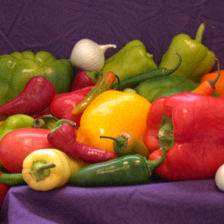

In [155]:
im

In [158]:
x_adv

tensor([[[[-0.4367, -0.4445, -0.4649,  ..., -0.4891, -0.4881, -0.4878],
          [-0.4288, -0.4550, -0.4731,  ..., -0.4928, -0.4455, -0.4863],
          [-0.4262, -0.5015, -0.5066,  ..., -0.4667, -0.4408, -0.4786],
          ...,
          [-0.7425, -0.7269, -0.6955,  ..., -0.5751, -0.5713, -0.5594],
          [-0.7190, -0.6876, -0.6641,  ..., -0.5673, -0.5073, -0.5580],
          [-0.6371, -0.6092, -0.6014,  ..., -0.5751, -0.4994, -0.5478]],

         [[-0.6798, -0.6955, -0.6989,  ..., -0.7367, -0.7398, -0.7555],
          [-0.6641, -0.7128, -0.7476,  ..., -0.7241, -0.7139, -0.7253],
          [-0.7211, -0.7320, -0.7178,  ..., -0.6915, -0.6865, -0.6904],
          ...,
          [-0.8619, -0.8670, -0.9045,  ..., -0.7947, -0.7947, -0.8025],
          [-0.8642, -0.8609, -0.8288,  ..., -0.7947, -0.7347, -0.8025],
          [-0.8142, -0.8057, -0.7975,  ..., -0.7947, -0.7347, -0.7987]],

         [[-0.4445, -0.4367, -0.4888,  ..., -0.5202, -0.5045, -0.4618],
          [-0.4881, -0.4763, -

In [229]:
def to_numpy(x):
    transform = transforms.Compose([
        transforms.Normalize(mean=[-1, -1, -1],
                             std=[1/0.5, 1/0.5, 1/0.5]),    
    ])
    ret = transform(x.squeeze().cpu())    
    ret = torch.where(ret > torch.ones_like(ret), torch.ones_like(ret), ret)
    ret = torch.where(ret < torch.zeros_like(ret), torch.zeros_like(ret), ret)
    ret = ret.detach().numpy()
    ret = np.transpose(ret, (1, 2, 0))
    #plt.imshow(ret)
    return ret
def to_PILimage(x):
    transform = transforms.Compose([
        transforms.Normalize(mean=[-1, -1, -1],
                             std=[1/0.5, 1/0.5, 1/0.5]),    
    ])
    ret = transform(x.squeeze().cpu())    
    ret = torch.where(ret > torch.ones_like(ret), torch.ones_like(ret), ret)
    ret = torch.where(ret < torch.zeros_like(ret), torch.zeros_like(ret), ret)
    ret = transforms.ToPILImage()(ret)
    return ret
to_numpy( (x_adv - x.cuda()) * 10) 

array([[[0.65      , 0.64999986, 0.65      ],
        [0.65      , 0.64999986, 0.65      ],
        [0.62643826, 0.59352624, 0.35      ],
        ...,
        [0.4268894 , 0.36533493, 0.35000014],
        [0.39258945, 0.35000014, 0.35000014],
        [0.35508576, 0.35000014, 0.602831  ]],

       [[0.65      , 0.64999986, 0.39260897],
        [0.6368946 , 0.48517573, 0.41263717],
        [0.54639655, 0.35000014, 0.35      ],
        ...,
        [0.36949414, 0.35000014, 0.35      ],
        [0.64497936, 0.40121126, 0.35000014],
        [0.40187913, 0.38328427, 0.35000014]],

       [[0.5848457 , 0.36493647, 0.37026423],
        [0.44331896, 0.35000014, 0.35000014],
        [0.3786807 , 0.4994439 , 0.3773454 ],
        ...,
        [0.46063218, 0.47397095, 0.35      ],
        [0.5510459 , 0.49897242, 0.35      ],
        [0.36188844, 0.5576377 , 0.35      ]],

       ...,

       [[0.64999986, 0.64134616, 0.38101572],
        [0.64999986, 0.53758967, 0.35000014],
        [0.64999986, 0

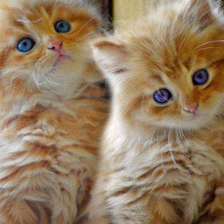

In [234]:
to_PILimage(x_adv4)

In [39]:
torch.max( xx -  transform3(x.squeeze().cpu()) )

tensor(0.0250, grad_fn=<MaxBackward1>)

In [40]:
x_adv.cuda() - x.cuda()

tensor([[[[ 0.0476,  0.0500, -0.0500,  ..., -0.0488, -0.0427,  0.0500],
          [-0.0478, -0.0500, -0.0485,  ...,  0.0500, -0.0272, -0.0406],
          [-0.0455, -0.0439, -0.0500,  ...,  0.0500, -0.0488, -0.0489],
          ...,
          [-0.0367, -0.0500, -0.0463,  ..., -0.0500,  0.0435,  0.0498],
          [-0.0481, -0.0400,  0.0500,  ...,  0.0500, -0.0446,  0.0500],
          [-0.0500, -0.0373, -0.0449,  ...,  0.0500,  0.0500, -0.0499]],

         [[-0.0500, -0.0445,  0.0500,  ..., -0.0393, -0.0289, -0.0443],
          [-0.0472, -0.0495, -0.0409,  ...,  0.0500, -0.0094, -0.0315],
          [-0.0452, -0.0485, -0.0500,  ...,  0.0345, -0.0500, -0.0500],
          ...,
          [-0.0464, -0.0500, -0.0369,  ...,  0.0182,  0.0372,  0.0484],
          [-0.0500, -0.0500,  0.0500,  ...,  0.0405, -0.0483,  0.0488],
          [-0.0500, -0.0486, -0.0500,  ..., -0.0296,  0.0477, -0.0500]],

         [[-0.0500, -0.0500, -0.0499,  ..., -0.0495, -0.0458, -0.0500],
          [-0.0500, -0.0500, -

In [10]:
transform2 = transforms.Compose([
    transforms.Normalize(mean=[-1, -1, -1],
                         std=[1/0.5, 1/0.5, 1/0.5]),
    transforms.ToPILImage()
    
])

In [11]:
im = transform2(x.squeeze().cpu() + (x_adv.squeeze().cpu() - x.squeeze().cpu())).convert("RGB")

In [13]:
im = transform2(x.squeeze().cpu())

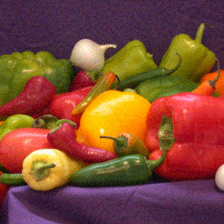

In [41]:
im

In [36]:
x_adv = fool_image_model(vgg16, x, torch.LongTensor([812]))

New Prob 0.04877331852912903
New Prob 0.43994906544685364
New Prob 0.5002743601799011
New Prob 0.8027586340904236
New Prob 0.8103222846984863
New Prob 0.9424323439598083
New Prob 0.9767791032791138
New Prob 0.981059730052948
New Prob 0.9930551648139954


In [37]:
x_adv

tensor([[[[-0.4191, -0.4245, -0.5402,  ..., -0.5233, -0.5094, -0.4088],
          [-0.5066, -0.5324, -0.5309,  ..., -0.4167, -0.5017, -0.5073],
          [-0.4886, -0.5341, -0.5324,  ..., -0.4088, -0.4998, -0.4999],
          ...,
          [-0.8092, -0.8069, -0.7718,  ..., -0.5951, -0.5173, -0.5032],
          [-0.7971, -0.7576, -0.6441,  ..., -0.4873, -0.5818, -0.5029],
          [-0.7127, -0.6765, -0.6763,  ..., -0.4951, -0.4794, -0.5872]],

         [[-0.7598, -0.7700, -0.6676,  ..., -0.7491, -0.7387, -0.7698],
          [-0.7414, -0.7593, -0.7585,  ..., -0.6441, -0.7035, -0.7335],
          [-0.7393, -0.7504, -0.7676,  ..., -0.6518, -0.7363, -0.7520],
          ...,
          [-0.9366, -0.9245, -0.9114,  ..., -0.7465, -0.7275, -0.7241],
          [-0.9324, -0.9167, -0.8088,  ..., -0.7242, -0.8130, -0.7238],
          [-0.8853, -0.8682, -0.8775,  ..., -0.7943, -0.7170, -0.8225]],

         [[-0.5245, -0.5167, -0.5087,  ..., -0.5397, -0.5203, -0.5324],
          [-0.5167, -0.5088, -

In [39]:
torch.nn.functional.softmax(vgg16(x_adv.cuda()),dim = 1)[0][812]

tensor(0.8175, device='cuda:0', grad_fn=<SelectBackward>)